<a href="https://colab.research.google.com/github/PatienceMutede/Detecting-Money-Laundering-using-Machine-Learning/blob/main/21027679_Detecting_Money_Laundering_Transactions_using_Machine_Learning_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from scipy.stats import spearmanr, kendalltau
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import norm
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import math
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score

**Importing the Dataset**

In [ ]:
data="/content/drive/MyDrive/Data Money Laundering/HI-Small_Trans.csv"

In [ ]:
dataset=pd.read_csv(data)

**Dataset Overview**

In [ ]:
dataset

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.340000,US Dollar,3697.340000,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.010000,US Dollar,0.010000,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.570000,US Dollar,14675.570000,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.970000,US Dollar,2806.970000,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.970000,US Dollar,36682.970000,US Dollar,Reinvestment,0
...,...,...,...,...,...,...,...,...,...,...,...
5078340,2022/09/10 23:57,54219,8148A6631,256398,8148A8711,0.154978,Bitcoin,0.154978,Bitcoin,Bitcoin,0
5078341,2022/09/10 23:35,15,8148A8671,256398,8148A8711,0.108128,Bitcoin,0.108128,Bitcoin,Bitcoin,0
5078342,2022/09/10 23:52,154365,8148A6771,256398,8148A8711,0.004988,Bitcoin,0.004988,Bitcoin,Bitcoin,0
5078343,2022/09/10 23:46,256398,8148A6311,256398,8148A8711,0.038417,Bitcoin,0.038417,Bitcoin,Bitcoin,0


In [ ]:
dataset.shape

(5078345, 11)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5078345 entries, 0 to 5078344
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Timestamp           object 
 1   From Bank           int64  
 2   Account             object 
 3   To Bank             int64  
 4   Account.1           object 
 5   Amount Received     float64
 6   Receiving Currency  object 
 7   Amount Paid         float64
 8   Payment Currency    object 
 9   Payment Format      object 
 10  Is Laundering       int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 426.2+ MB


The dataset has 5 million rows and 8 columns

**Checking for Data Imbalance**

In [ ]:
x = dataset['Is Laundering'].value_counts()

In [ ]:
x

0    5073168
1       5177
Name: Is Laundering, dtype: int64

In [ ]:
x/len(dataset)

0    0.998981
1    0.001019
Name: Is Laundering, dtype: float64

In [ ]:
x[1]/x[0]

0.0010204668956360207

The ratio of the laundering transactions is very low and this is a case of imbalance

The ratio of laundering to non-laundering is very low (0.001).In this section the ratio of laundering to non-laundering is going to be visualized.

Text(0.5, 1.0, 'Class Distributions \n (0:Non_Suspicious || 1: Suspicious)')

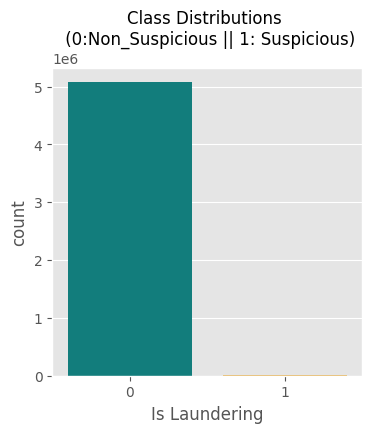

In [ ]:
cls = ["#008F8D", "#F9BF51"]
sns.set_palette(sns.color_palette(cls))

fig,ax=plt.subplots(figsize=(4,4))

sns.countplot( data=dataset,x='Is Laundering')
plt.title('Class Distributions \n (0:Non_Suspicious || 1: Suspicious)', fontsize=12)

It can be clearly seen from the histogram that there is a very huge data imbalance. There are 5073168 and 5177 non-suspicious and suspicious transactions respectively. In the next section data transformation will be done to cater for the data imbalance.


**Data processing- Data Transformation**

In [ ]:
Suspicious= dataset[dataset['Is Laundering']==1]

In [ ]:
Suspicious.shape

(5177, 11)

In [ ]:
Suspicious['Amount Paid'].describe()

count    5.177000e+03
mean     3.613531e+07
std      1.527919e+09
min      3.227000e-03
25%      2.634970e+03
50%      8.667210e+03
75%      1.883227e+04
max      8.485314e+10
Name: Amount Paid, dtype: float64

In [ ]:
dataset.head(8000)

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0
...,...,...,...,...,...,...,...,...,...,...,...
7995,2022/09/01 00:11,1686,800DB4A00,1686,800DB4A00,17.64,US Dollar,17.64,US Dollar,Reinvestment,0
7996,2022/09/01 00:11,11904,800DB8320,908,812F2F8A0,3.93,US Dollar,3.93,US Dollar,Credit Card,0
7997,2022/09/01 00:04,21258,800DB92A0,21258,800DB92A0,95001.11,US Dollar,95001.11,US Dollar,Reinvestment,0
7998,2022/09/01 00:06,701,800411880,21258,800DB92A0,5274.06,US Dollar,5274.06,US Dollar,Cheque,0


In [ ]:
top=dataset.head(8000)

Merging Two datasets

In [ ]:
df=pd.concat([Suspicious, top])

In [ ]:
df.shape

(13177, 11)

In [ ]:
df

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
4742,2022/09/01 00:21,70,100428660,1124,800825340,389769.39,US Dollar,389769.39,US Dollar,Cheque,1
40621,2022/09/01 00:03,70,100428660,11474,805B716C0,29024.33,US Dollar,29024.33,US Dollar,Credit Card,1
69152,2022/09/01 00:01,70,100428660,15980,80B39E7B0,792.92,US Dollar,792.92,US Dollar,Credit Card,1
85763,2022/09/01 00:03,70,100428660,113798,80DC756E0,13171425.53,US Dollar,13171425.53,US Dollar,Cheque,1
90684,2022/09/01 00:23,70,100428660,32375,80E480620,14288.83,US Dollar,14288.83,US Dollar,Cash,1
...,...,...,...,...,...,...,...,...,...,...,...
7995,2022/09/01 00:11,1686,800DB4A00,1686,800DB4A00,17.64,US Dollar,17.64,US Dollar,Reinvestment,0
7996,2022/09/01 00:11,11904,800DB8320,908,812F2F8A0,3.93,US Dollar,3.93,US Dollar,Credit Card,0
7997,2022/09/01 00:04,21258,800DB92A0,21258,800DB92A0,95001.11,US Dollar,95001.11,US Dollar,Reinvestment,0
7998,2022/09/01 00:06,701,800411880,21258,800DB92A0,5274.06,US Dollar,5274.06,US Dollar,Cheque,0


Checking the occurances of suspicious and non-suspicious transactions for the new dataset

In [ ]:
y = df['Is Laundering'].value_counts()

In [ ]:
y

0    7999
1    5178
Name: Is Laundering, dtype: int64

In [ ]:
y/len(df)

0    0.607043
1    0.392957
Name: Is Laundering, dtype: float64

In [ ]:
y[1]/y[0]

0.6473309163645455

**Class Visualization**


Text(0.5, 1.0, 'Class Distributions \n (0:Non_Suspicious || 1: Suspicious)')

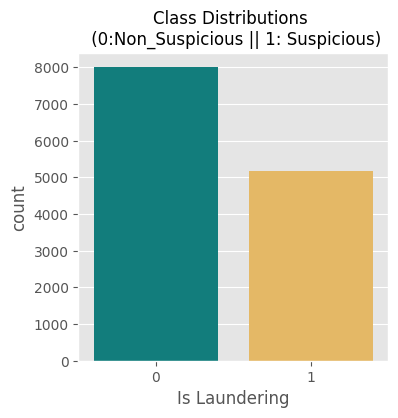

In [ ]:
cls = ["#008F8D", "#F9BF51"]
sns.set_palette(sns.color_palette(cls))

fig,ax=plt.subplots(figsize=(4,4))

sns.countplot( data=df,x='Is Laundering')
plt.title('Class Distributions \n (0:Non_Suspicious || 1: Suspicious)', fontsize=12)

In [ ]:
df.describe()

,From Bank,To Bank,Amount Received,Amount Paid,Is Laundering
count,13177.000000,13177.000000,1.317700e+04,1.317700e+04,13177.000000
mean,19885.326023,23719.104197,1.497488e+07,1.497488e+07,0.392957
std,50500.549548,53804.241041,9.579463e+08,9.579463e+08,0.488426
min,1.000000,1.000000,3.227000e-03,3.227000e-03,0.000000
25%,70.000000,513.000000,3.079400e+02,3.079400e+02,0.000000
50%,1467.000000,1665.000000,5.351830e+03,5.351830e+03,0.000000
75%,11657.000000,17610.000000,2.418919e+04,2.418919e+04,1.000000
max,254958.000000,256229.000000,8.485314e+10,8.485314e+10,1.000000


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
From Bank,13177.0,1.988533e+04,5.050055e+04,1.000000,70.00,1467.00,11657.00,2.549580e+05
To Bank,13177.0,2.371910e+04,5.380424e+04,1.000000,513.00,1665.00,17610.00,2.562290e+05
Amount Received,13177.0,1.497488e+07,9.579463e+08,0.003227,307.94,5351.83,24189.19,8.485314e+10
Amount Paid,13177.0,1.497488e+07,9.579463e+08,0.003227,307.94,5351.83,24189.19,8.485314e+10
Is Laundering,13177.0,3.929574e-01,4.884260e-01,0.000000,0.00,0.00,1.00,1.000000e+00


**Inference**

amount paid and the amount received.
The data points are far spread out from the mean, which indicates a high variance in the amount paid and the amount received.(75% of the amount paid and the amount received are below 15351.83, whereas the remaining 25% are between 24189.19 and 84,853,140,000 of amount paid and received.)

In [ ]:
df['Receiving Currency'].unique()

array(['US Dollar', 'Euro', 'Yuan', 'Yen', 'Canadian Dollar',
       'Swiss Franc', 'Shekel', 'Rupee', 'Australian Dollar',
       'Saudi Riyal', 'Mexican Peso', 'UK Pound', 'Ruble', 'Brazil Real',
       'Bitcoin'], dtype=object)

In [ ]:
df['Payment Currency'].unique()

array(['US Dollar', 'Euro', 'Yuan', 'Yen', 'Canadian Dollar',
       'Swiss Franc', 'Shekel', 'Rupee', 'Australian Dollar',
       'Saudi Riyal', 'Mexican Peso', 'UK Pound', 'Ruble', 'Brazil Real',
       'Bitcoin'], dtype=object)

In [ ]:
df['Payment Format'].unique()

array(['Cheque', 'Credit Card', 'Cash', 'ACH', 'Bitcoin', 'Reinvestment',
       'Wire'], dtype=object)

**Data Visualization**

<ipython-input-65-cfc5da31a260>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount Paid'])


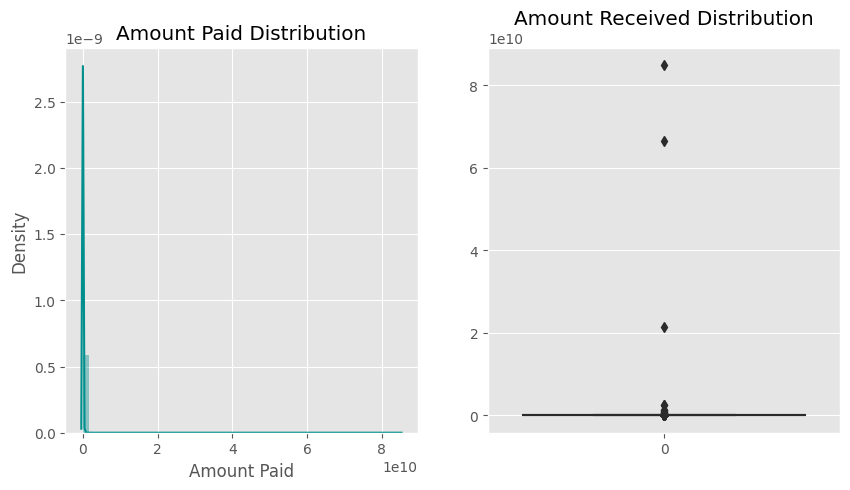

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Amount Paid Distribution')
sns.distplot(df['Amount Paid'])

plt.subplot(1,2,2)
plt.title('Amount Received Distribution')
sns.boxplot(df['Amount Received'])

plt.show()

In [ ]:
print("Skewness: %f" % df['Amount Paid'].skew())
print("Kurtosis: %f" % df['Amount Paid'].kurt())

Skewness: 78.865408
Kurtosis: 6439.980008


The Distribution of the amount paid shows that it is not evenely distributed. The skewness and the kurtosis are greater than 1. The data right skewed, with the amount paid ranging from 0.003227 upto max of 84,853,140,000 paid. The Average amount paid in the transactions is 14,974,880.

Our tails is starting from approximately 15 million so we can check how many transactions have amount paid more than 15 million. If the number is small we can split the data and remove outliers to improve the distribution.

 This indicates that the majority of the
transactions have low amounts, while a few transactions have extremely high amounts. As
a result, this suggests that the dataset contains some outliers in terms of transaction
amounts. Therefore, when building a model for money laundering detection, it may be necessary to
handle outliers in the Amount feature, for instance, by using a log transformation or robust
statistical methods

Visualisation of Categorical Variables

[Text(0.5, 0, 'Receiving Currency'),
 Text(0, 0.5, 'Frequency of Receiving Currency')]

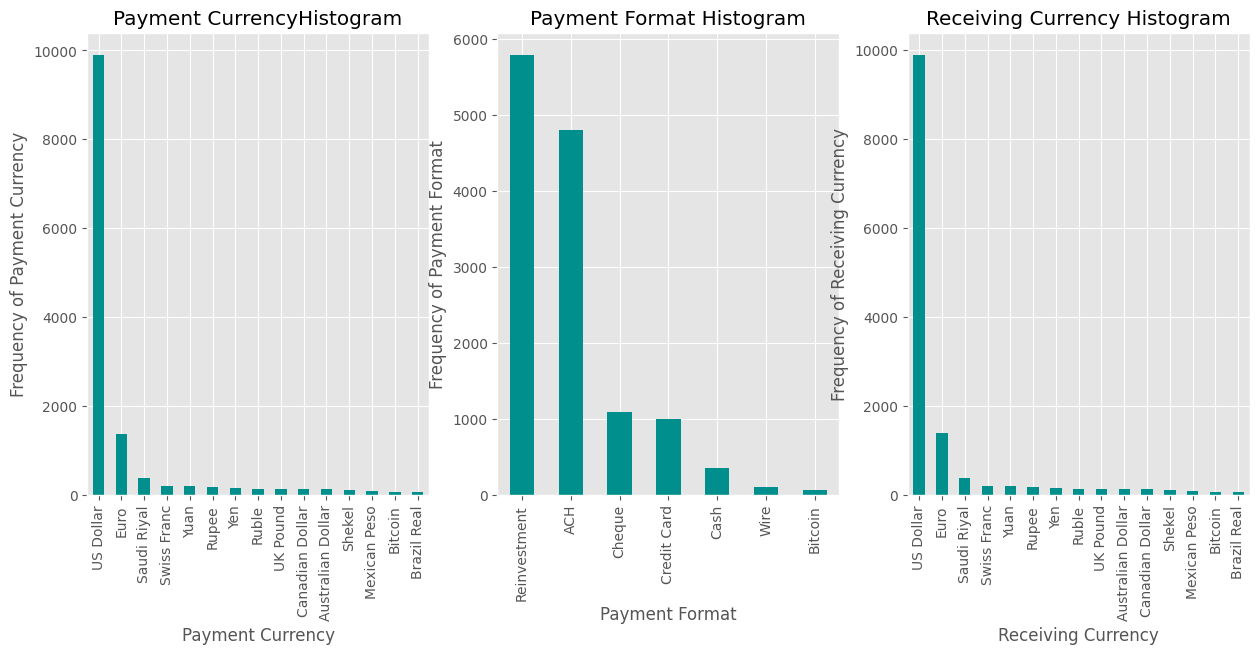

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
plt1 = df['Payment Currency'].value_counts().plot(kind='bar')
plt.title('Payment CurrencyHistogram')
plt1.set(xlabel = 'Payment Currency', ylabel='Frequency of Payment Currency')

plt.subplot(1,3,2)
plt1 = df['Payment Format'].value_counts().plot(kind='bar')
plt.title('Payment Format Histogram')
plt1.set(xlabel = 'Payment Format', ylabel='Frequency of Payment Format')

plt.subplot(1,3,3)
plt1 = df['Receiving Currency'].value_counts().plot(kind='bar')
plt.title('Receiving Currency Histogram')
plt1.set(xlabel = 'Receiving Currency', ylabel='Frequency of Receiving Currency')

**Inference**

The most used Payment Currency is US Dollar followed by Euro, Reinvestment is the most used Payment Format and the most used Receiving Currency is the US Dollar.

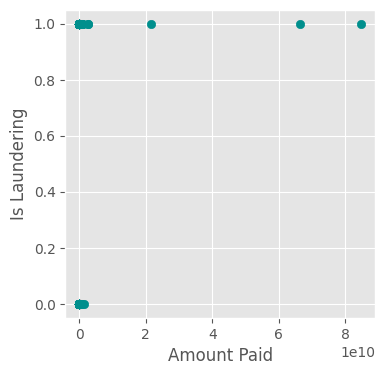

In [ ]:
plt.figure(figsize = (4, 4))

plt.scatter(df['Amount Paid'], df['Is Laundering'])
plt.xlabel('Amount Paid')
plt.ylabel('Is Laundering')
plt.grid(True)

**Handling Categorical Variables**- **Label Encoding**


In [ ]:
le= LabelEncoder()

In [ ]:
for col in df.select_dtypes(include=['object']).columns:
  #print the column name and the unique values
  print(f"{col}: {df[col].unique()}")

Timestamp: ['2022/09/01 00:21' '2022/09/01 00:03' '2022/09/01 00:01' ...
 '2022/09/01 00:27' '2022/09/01 00:18' '2022/09/01 00:24']
Account: ['100428660' '812EE86F0' '1004286A8' ... '800DB8320' '800DB92A0'
 '800411880']
Account.1: ['800825340' '805B716C0' '80B39E7B0' ... '800DB4A00' '812F2F8A0'
 '800DB92A0']
Receiving Currency: ['US Dollar' 'Euro' 'Yuan' 'Yen' 'Canadian Dollar' 'Swiss Franc' 'Shekel'
 'Rupee' 'Australian Dollar' 'Saudi Riyal' 'Mexican Peso' 'UK Pound'
 'Ruble' 'Brazil Real' 'Bitcoin']
Payment Currency: ['US Dollar' 'Euro' 'Yuan' 'Yen' 'Canadian Dollar' 'Swiss Franc' 'Shekel'
 'Rupee' 'Australian Dollar' 'Saudi Riyal' 'Mexican Peso' 'UK Pound'
 'Ruble' 'Brazil Real' 'Bitcoin']
Payment Format: ['Cheque' 'Credit Card' 'Cash' 'ACH' 'Bitcoin' 'Reinvestment' 'Wire']


unique values of all the object values have been checked

In [ ]:
#Loop over each column in the Dataframe where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
  #Initialise a LabelEncoder object
  label_encoder= preprocessing.LabelEncoder()

  #Fit the encoder to the unique values in the column
  label_encoder.fit(df[col].unique())

  #Transform the column using the encoder
  df[col]= label_encoder.transform(df[col])

  #print the column name and the unique encoded values
  print(f"{col}: {df[col].unique()}")

Timestamp: [21  3  1 ... 27 18 24]
Account: [   0 9143    1 ... 6243 6247 1697]
Account.1: [3607 7113 8279 ... 5859 9605 5872]
Receiving Currency: [12  4 14 13  3 10  9  7  0  8  5 11  6  2  1]
Payment Currency: [12  4 14 13  3 10  9  7  0  8  5 11  6  2  1]
Payment Format: [3 4 2 0 1 5 6]


Dataset after label encoding

In [ ]:
df

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
4742,21,70,0,1124,3607,389769.39,12,389769.39,12,3,1
40621,3,70,0,11474,7113,29024.33,12,29024.33,12,4,1
69152,1,70,0,15980,8279,792.92,12,792.92,12,4,1
85763,3,70,0,113798,8780,13171425.53,12,13171425.53,12,3,1
90684,23,70,0,32375,8886,14288.83,12,14288.83,12,2,1
...,...,...,...,...,...,...,...,...,...,...,...
7995,11,1686,6231,1686,5859,17.64,12,17.64,12,5,0
7996,11,11904,6243,908,9605,3.93,12,3.93,12,4,0
7997,4,21258,6247,21258,5872,95001.11,12,95001.11,12,5,0
7998,6,701,1697,21258,5872,5274.06,12,5274.06,12,3,0


In [ ]:
df.corr()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
Timestamp,1.000000,0.322963,0.469162,0.299671,0.519867,-0.005096,-0.467880,-0.005096,-0.468686,-0.726717,0.807534
From Bank,0.322963,1.000000,0.482463,0.258872,0.384995,-0.002323,-0.218509,-0.002323,-0.218894,-0.401268,0.402241
Account,0.469162,0.482463,1.000000,0.300307,0.687334,0.015365,-0.284659,0.015365,-0.284798,-0.570806,0.548469
To Bank,0.299671,0.258872,0.300307,1.000000,0.496972,0.010584,-0.232190,0.010584,-0.232622,-0.338468,0.403004
Account.1,0.519867,0.384995,0.687334,0.496972,1.000000,0.012968,-0.366697,0.012968,-0.367108,-0.579847,0.676695
Amount Received,-0.005096,-0.002323,0.015365,0.010584,0.012968,1.000000,-0.020770,1.000000,-0.020796,-0.018535,0.017767
Receiving Currency,-0.467880,-0.218509,-0.284659,-0.232190,-0.366697,-0.020770,1.000000,-0.020770,0.998910,0.502957,-0.576813
Amount Paid,-0.005096,-0.002323,0.015365,0.010584,0.012968,1.000000,-0.020770,1.000000,-0.020796,-0.018535,0.017767
Payment Currency,-0.468686,-0.218894,-0.284798,-0.232622,-0.367108,-0.020796,0.998910,-0.020796,1.000000,0.502479,-0.577812
Payment Format,-0.726717,-0.401268,-0.570806,-0.338468,-0.579847,-0.018535,0.502957,-0.018535,0.502479,1.000000,-0.864772


<Axes: >

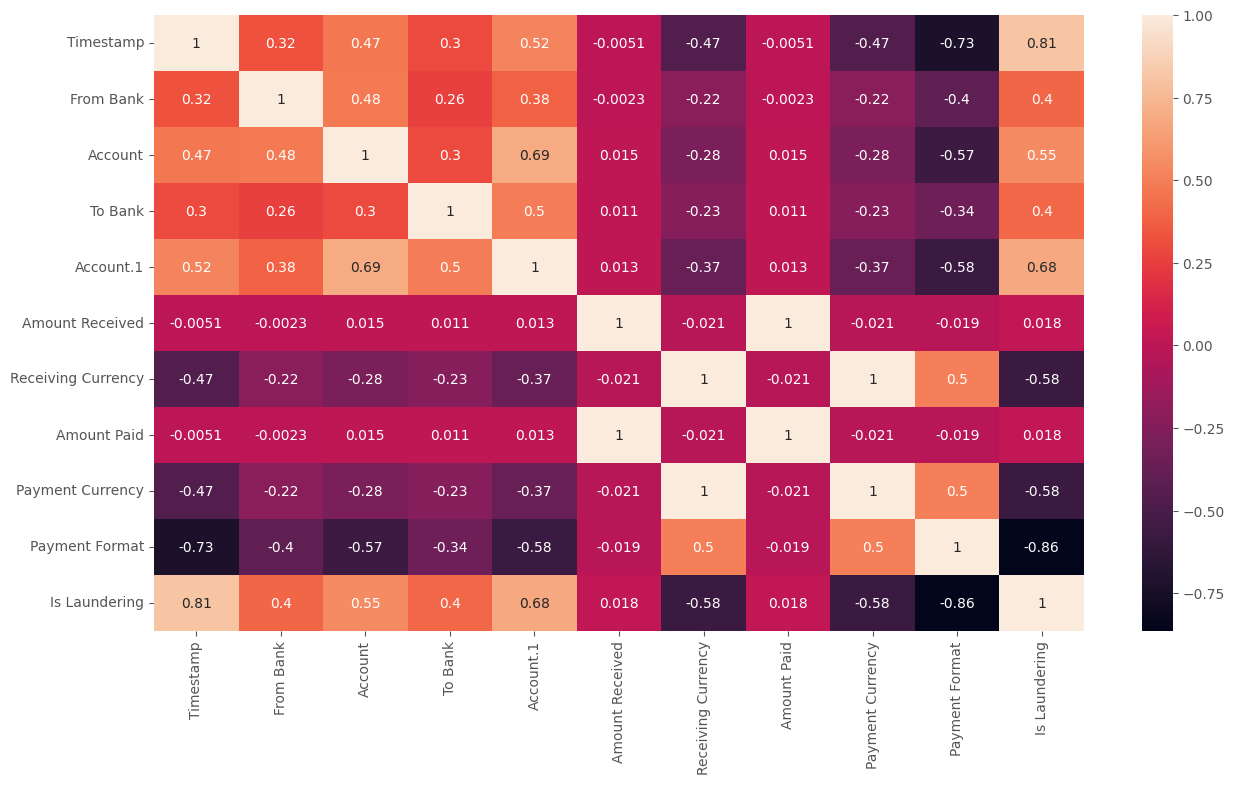

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

 From the heatmap, it can be observed that there is strong positive and negative
correlations between some pairs of variables in the dataset. The strongest correlations are
found:
• Is Laundering and Time,
• Is Laundering and Account.1,
Although these correlations are relatively high, the risk of multicollinearity is not expected
to be significant. Overall, the heatmap suggests that there is no correlation betwwen Is Laundering and amount paid and received

Showing Correlation Between Is Laundering (Target variable) and other independent variables.


In [ ]:
Correlation= df.corr()

In [ ]:
Correlation["Is Laundering"]

Timestamp             0.807534
From Bank             0.402241
Account               0.548469
To Bank               0.403004
Account.1             0.676695
Amount Received       0.017767
Receiving Currency   -0.576813
Amount Paid           0.017767
Payment Currency     -0.577812
Payment Format       -0.864772
Is Laundering         1.000000
Name: Is Laundering, dtype: float64

Spliting Dataset for Training

**MACHINE LEARNING**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Is Laundering', axis=1), df['Is Laundering'], test_size=0.2, random_state=42)

In [ ]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [ ]:
# Instantiate the Scaler
scaler = StandardScaler()

In [ ]:
# Fit the data into scaler and transform
x_train['Amount Received'] = scaler.fit_transform(x_train[['Amount Received']])
x_train['Amount Paid'] = scaler.fit_transform(x_train[['Amount Paid']])

x_train. head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format
2064799,989,70,10,10,8711,-0.016615,2,-0.016615,2,4
2611992,2375,27241,6903,16871,9325,-0.016605,4,-0.016605,4,0
3686745,2569,15447,8586,225156,8839,-0.016617,12,-0.016617,12,0
2112,8,1601,1965,1601,1758,-0.016618,12,-0.016618,12,5
4738,23,220,3920,220,3600,-0.014781,12,-0.014781,12,5


**RANDOM FOREST**

In [ ]:
model = RandomForestClassifier(random_state=5, n_estimators=20)

In [ ]:
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=5)

In [ ]:
rf_predicted = model.predict(x_test)

In [ ]:
rf_predicted

array([0, 0, 1, ..., 1, 1, 0])

In [ ]:
probs = model.predict_proba(x_test)

In [ ]:
print(f'Accuracy Score: {accuracy_score(y_test, rf_predicted):0.3f}')

Accuracy Score: 0.999


Random Forest Confusion matrix for the test set
[[1587    0]
 [   3 1046]]


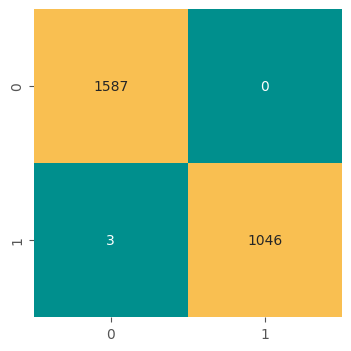

In [ ]:
print("Random Forest Confusion matrix for the test set")
fig = plt.figure(figsize=(4,4))
print(confusion_matrix(y_test, rf_predicted))
conf_mat = confusion_matrix(y_test,rf_predicted)
sns.heatmap(conf_mat, square=True, annot=True, cmap=cls, fmt='d', cbar=False)

plt.show()

============Confusion matrix===========



<Axes: >

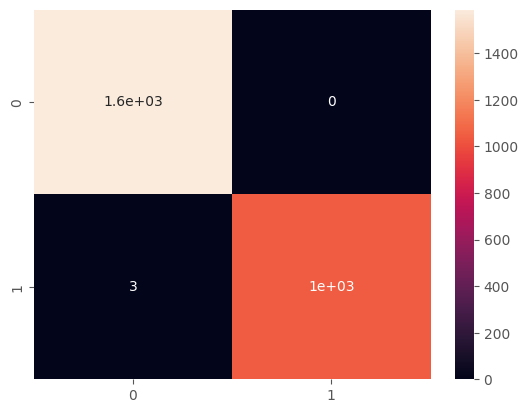

In [ ]:
cf_matrix = confusion_matrix(y_test, rf_predicted)
print('============Confusion matrix===========\n')
sns.heatmap(cf_matrix, annot=True)

In [ ]:
# Obtain precision and recall
precision, recall, _ = precision_recall_curve(y_test, rf_predicted)
print(f'Precision: {precision}\nRecall: {recall}')

Precision: [0.39795144 1.         1.        ]
Recall: [1.         0.99714013 0.        ]


In [ ]:
# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, rf_predicted)
average_precision

0.9982782214725782

In [ ]:
print('\nClassification Report:')
print(classification_report(y_test, rf_predicted))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1587
           1       1.00      1.00      1.00      1049

    accuracy                           1.00      2636
   macro avg       1.00      1.00      1.00      2636
weighted avg       1.00      1.00      1.00      2636



The model predicts 1046 cases of money laundering, out of which 1049 are actual fraud. There is only 1 false positive. This is really good, and as a result you have a very high precision score. However the model miss 3 cases of actual fraud.


GridSearchCV for hyperparameter tuning

In [ ]:
# Create the parameter grid
param_grid = {'max_depth': [80, 90, 100, 110],
              'max_features': [2, 3],
              'min_samples_leaf': [3, 4, 5],
              'min_samples_split': [8, 10, 12],
              'n_estimators': [100, 200, 300, 1000]}

              # Define which model to use
model = RandomForestRegressor()

# Instantiate the grid search model
grid_search_model = GridSearchCV(estimator = model,
                                 param_grid = param_grid,
                                 cv = 5,
                                 n_jobs = -1,
                                 scoring='f1')

# Fit the grid search to the data
resultsgd=grid_search_model.fit(x_train, y_train)

# Get the optimal parameters
grid_search_model.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan 

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}

In [ ]:
rf_results= grid_search_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan 

In [ ]:
print('Best Recall Score of Random Forest model: %s' %resultsgd.best_score_)
print('Best Hyperparameters of Random Forest model: %s' % resultsgd.best_params_)

Best Recall Score of Random Forest model: nan
Best Hyperparameters of Random Forest model: {'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}


In [ ]:
# Define the model with balanced subsample
model = RandomForestClassifier(class_weight='balanced_subsample', random_state=5, n_estimators=100)

# Fit your training model to your training set
model.fit(x_train, y_train)

# Obtain the predicted values and probabilities from the model
predicted = model.predict(x_test)
probs = model.predict_proba(x_test)

# Print the ROC curve, classification report and confusion matrix
print('ROC Score:')
print(roc_auc_score(y_test, probs[:,1]))
print('\nClassification Report:')
print(classification_report(y_test, predicted))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predicted))

ROC Score:
0.9998654463127785

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1587
           1       1.00      1.00      1.00      1049

    accuracy                           1.00      2636
   macro avg       1.00      1.00      1.00      2636
weighted avg       1.00      1.00      1.00      2636


Confusion Matrix:
[[1587    0]
 [   3 1046]]


The model results don't improve drastically. The 3 false negatives(cases of money laundering not detected) have not changed, but now we have zero false positives (cases of false money laundering detected). If we mostly care about catching fraud, and not so much about the false positives, this does actually not improve our model at all.

In [ ]:
def get_model_results(x_train: np.ndarray, y_train: np.ndarray,
                      x_test: np.ndarray, y_test: np.ndarray, model):
    """
    model: sklearn model (e.g. RandomForestClassifier)
    """
    # Fit your training model to your training set
    model.fit(x_train, y_train)

    # Obtain the predicted values and probabilities from the model
    predicted = model.predict(x_test)

    try:
        probs = model.predict_proba(x_test)
        print('ROC Score:')
        print(roc_auc_score(y_test, probs[:,1]))
    except AttributeError:
        pass
         # Print the ROC curve, classification report and confusion matrix
    print('\nClassification Report:')
    print(classification_report(y_test, predicted))
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, predicted))

In [ ]:
# Change the model options
model = RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:12},
                               criterion='entropy',
                               # Change depth of model
                               max_depth=10,
                               # Change the number of samples in leaf nodes
                               min_samples_leaf=10,
                               # Change the number of trees to use
                               n_estimators=20,
                               n_jobs=-1,
                               random_state=5)
# Run the function get_model_results
get_model_results(x_train, y_train, x_test, y_test, model)

ROC Score:
0.9998330092631804

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1587
           1       1.00      1.00      1.00      1049

    accuracy                           1.00      2636
   macro avg       1.00      1.00      1.00      2636
weighted avg       1.00      1.00      1.00      2636


Confusion Matrix:
[[1587    0]
 [   3 1046]]


In [ ]:
from sklearn.model_selection import GridSearchCV

once GridSearchCV and model are fit to the data, obtain the parameters belonging to the optimal model by using the best_params_ attribute


**LOGISTIC REGRESSION**

In [ ]:
results = pd.DataFrame(columns=['Model Name', 'Accuracy', 'F1-score', 'ROC'])

In [ ]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
logistic = LogisticRegression(C=0.01)

In [ ]:
# Fit the model on the train set
logistic_model = logistic.fit(x_train, y_train)


In [ ]:
# Prepare results function
def display_test_results(model_name, model):

    # Prediction on the test set
    y_test_pred = model.predict(x_test)

    # Confusion matrix
    print("------------------ Confusion Matrix --------------------")
    c_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    print(c_matrix)

    cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
    cm_display.plot(cmap=plt.cm.Blues)
    plt.show()


    # classification_report
    print("------------------ classification_report --------------------")
    print(classification_report(y_test, y_test_pred))

    print("------------------ More Specific classification_report --------------------")
    TP = c_matrix[1,1] # true positive
    TN = c_matrix[0,0] # true negatives
    FP = c_matrix[0,1] # false positives
    FN = c_matrix[1,0] # false negatives

    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

# Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(y_test, y_test_pred))

    # Predicted probability
    y_test_pred_proba = model.predict_proba(x_test)[:,1]

    # roc_auc
    print("------------------ ROC --------------------")
    roc_auc = metrics.roc_auc_score(y_test, y_test_pred_proba)

    # Plot the ROC curve
    draw_roc(y_test, y_test_pred_proba)

    # add all metrics score in final result store
    results.loc[len(results)] = [model_name, metrics.accuracy_score(y_test, y_test_pred), f1_score(y_test, y_test_pred), roc_auc]

    return None

------------------ Confusion Matrix --------------------
[[ 630  957]
 [   0 1049]]


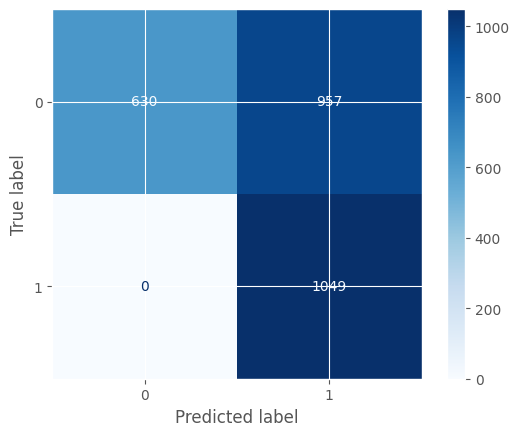

------------------ classification_report --------------------
              precision    recall  f1-score   support

           0       1.00      0.40      0.57      1587
           1       0.52      1.00      0.69      1049

    accuracy                           0.64      2636
   macro avg       0.76      0.70      0.63      2636
weighted avg       0.81      0.64      0.62      2636

------------------ More Specific classification_report --------------------
Accuracy:- 0.6369499241274659
Sensitivity:- 1.0
Specificity:- 0.39697542533081287
F1-Score:- 0.6867430441898527
------------------ ROC --------------------


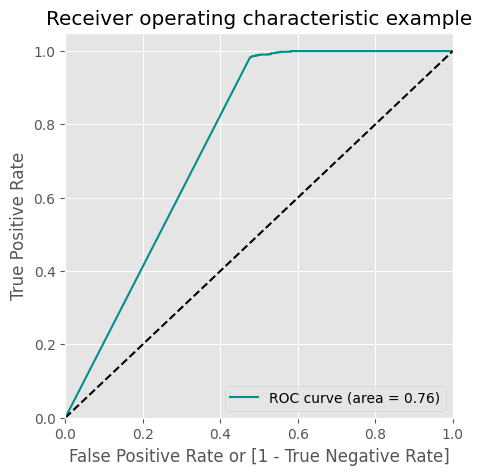

In [ ]:
display_test_results("Logistic Regression", logistic_model)

ROC on the test set is 0.76 which is not bad.

**SUPPORT VECTOR MACHINE**

In [ ]:
svc_model = SVC()

In [ ]:
svc_model.fit(x_train,y_train)

SVC()

In [ ]:
y3_pred = svc_model.predict(x_test)
y3_pred

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
cm_svm = confusion_matrix(y_test, y3_pred)

<Axes: >

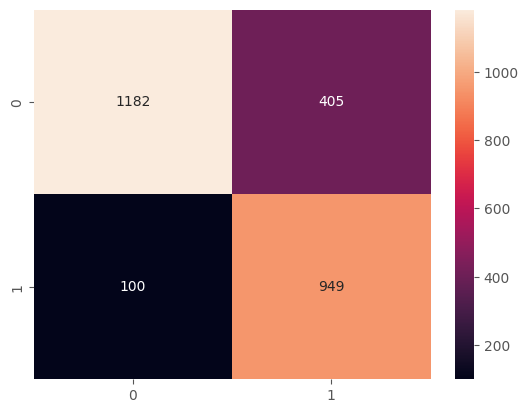

In [ ]:
sns.heatmap(cm_svm, annot = True, fmt ='d')

In [ ]:
print(classification_report(y_test, y3_pred))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1587
           1       0.70      0.90      0.79      1049

    accuracy                           0.81      2636
   macro avg       0.81      0.82      0.81      2636
weighted avg       0.83      0.81      0.81      2636



In [ ]:
param_grid = {'C':[0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 4)

In [ ]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=   7.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=   8.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=   8.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=   7.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.609 total time=   9.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.608 total time=   6.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.608 total time=   8.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.608 total time=   6.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.608 total time=   8.7s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.609 total time=   6.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.608 total time=   8.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [ ]:
grid.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
grid_pred = grid.predict(x_test)

In [ ]:
cms = confusion_matrix(y_test, grid_pred)

<Axes: >

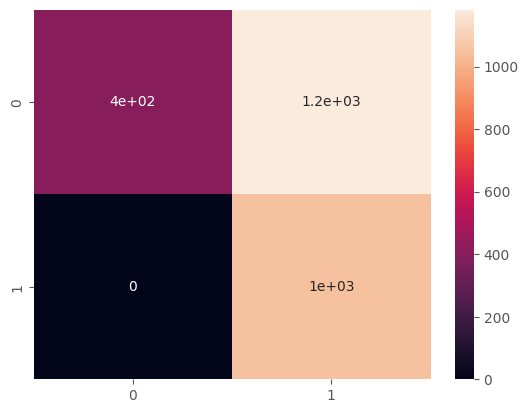

In [ ]:
sns.heatmap(cms, annot = True)

In [ ]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       1.00      0.26      0.41      1587
           1       0.47      1.00      0.64      1049

    accuracy                           0.55      2636
   macro avg       0.74      0.63      0.52      2636
weighted avg       0.79      0.55      0.50      2636

